In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/dataset.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
df['merchant'].unique()

array(['fraud_Rippin, Kub and Mann', 'fraud_Heller, Gutmann and Zieme',
       'fraud_Lind-Buckridge', 'fraud_Kutch, Hermiston and Farrell',
       'fraud_Keeling-Crist', 'fraud_Stroman, Hudson and Erdman',
       'fraud_Rowe-Vandervort', 'fraud_Corwin-Collins',
       'fraud_Herzog Ltd', 'fraud_Schoen, Kuphal and Nitzsche',
       'fraud_Rutherford-Mertz', 'fraud_Kerluke-Abshire',
       'fraud_Lockman Ltd', 'fraud_Kiehn Inc', 'fraud_Beier-Hyatt',
       'fraud_Schmidt and Sons', 'fraud_Lebsack and Sons',
       'fraud_Mayert Group', 'fraud_Konopelski, Schneider and Hartmann',
       'fraud_Schultz, Simonis and Little', 'fraud_Bauch-Raynor',
       'fraud_Harris Inc', 'fraud_Kling-Grant', 'fraud_Pacocha-Bauch',
       'fraud_Lesch Ltd', 'fraud_Kunde-Sanford', "fraud_Deckow-O'Conner",
       'fraud_Bruen-Yost', 'fraud_Kunze Inc',
       'fraud_Nitzsche, Kessler and Wolff',
       'fraud_Kihn, Abernathy and Douglas', 'fraud_Torphy-Goyette',
       'fraud_Balistreri-Nader', 'fraud_Bahrin

In [9]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [10]:
df['job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

In [8]:
# data types & non-null counts
df.info()

# basic stats for numeric cols
df.describe().T

# how many rows / fraction of fraud cases
print("Total rows:", len(df))
print("Fraud rate: {:.2%}".format(df["is_fraud"].mean()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [9]:
# convert to pandas datetime
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df["dob"], errors="coerce")   

# derive age at transaction
df["age"] = ((df["trans_date_trans_time"] - df["dob"])
               .dt.days // 365)

# extract time components
df["tx_hour"]   = df["trans_date_trans_time"].dt.hour
df["tx_weekday"]= df["trans_date_trans_time"].dt.day_name()
df["tx_month"]  = df["trans_date_trans_time"].dt.month

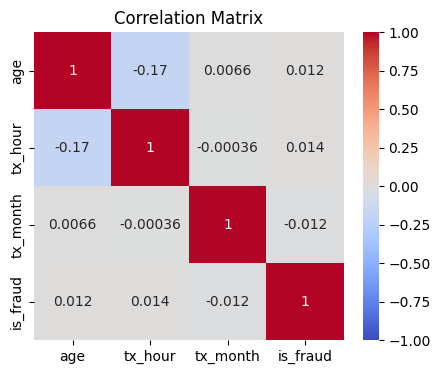

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# select only the numeric cols + label
corr_df = df[['age','tx_hour','tx_month','is_fraud']]

# compute correlation matrix
corr = corr_df.corr()

# plot
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [13]:
bins = [0,18,30,45,60,100]
labels = ['<18','18–29','30–44','45–59','60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


/var/folders/dw/956bzn3n3rz7w2l2d7pbc30m0000gn/T/ipykernel_10981/685935061.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_age = df.groupby('age_group')['is_fraud'].mean()


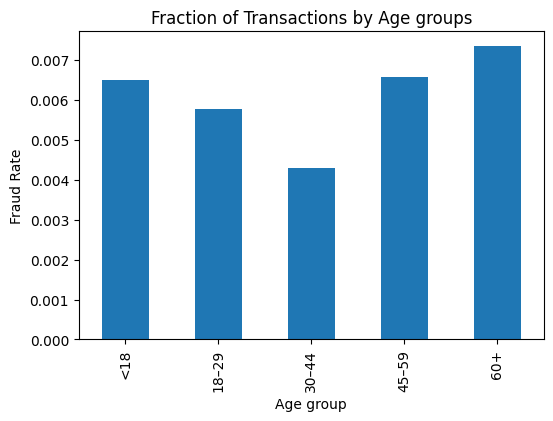

In [20]:
by_age = df.groupby('age_group')['is_fraud'].mean()
by_age.plot(kind='bar', figsize=(6,4))
plt.xlabel("Age group")
plt.ylabel("Fraud Rate")
plt.title("Fraction of Transactions by Age groups")
plt.show()

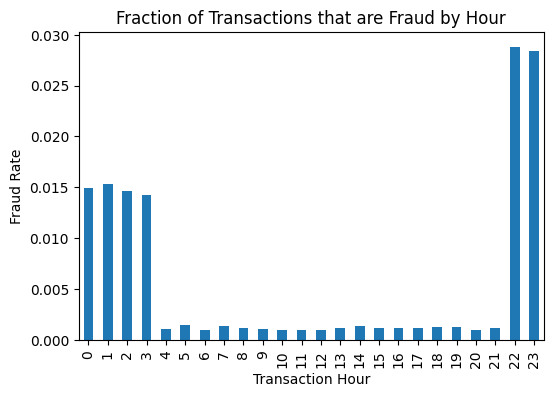

In [22]:
# e.g. by hour
hourly = df.groupby('tx_hour')['is_fraud'].mean()
hourly.plot(kind='bar', figsize=(6,4))
plt.xlabel("Transaction Hour")
plt.ylabel("Fraud Rate")
plt.title("Fraction of Transactions that are Fraud by Hour")
plt.show()

In [ ]:
# e.g. by hour
hourly = df.groupby('tx_hour')['is_fraud'].mean()
hourly.plot(kind='bar', figsize=(6,4))
plt.xlabel("Transaction Hour")
plt.ylabel("Fraud Rate")
plt.title("Fraction of Transactions that are Fraud by Hour")
plt.show()

/var/folders/dw/956bzn3n3rz7w2l2d7pbc30m0000gn/T/ipykernel_10981/1114762644.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly = df.groupby('tx_weekday')['is_fraud'].mean()


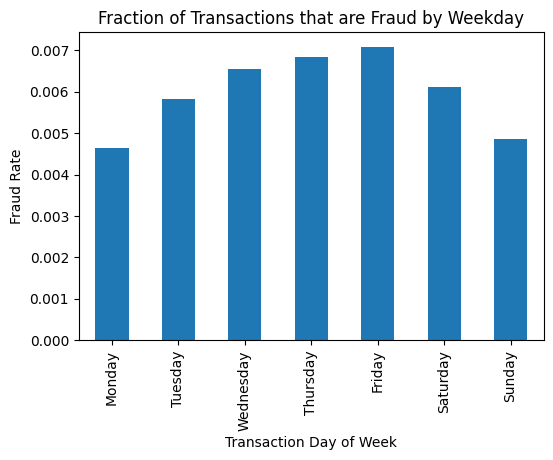

In [21]:
# e.g. by month
weekly = df.groupby('tx_weekday')['is_fraud'].mean()
weekly.plot(kind='bar', figsize=(6,4))
plt.xlabel("Transaction Day of Week")
plt.ylabel("Fraud Rate")
plt.title("Fraction of Transactions that are Fraud by Weekday")
plt.show()

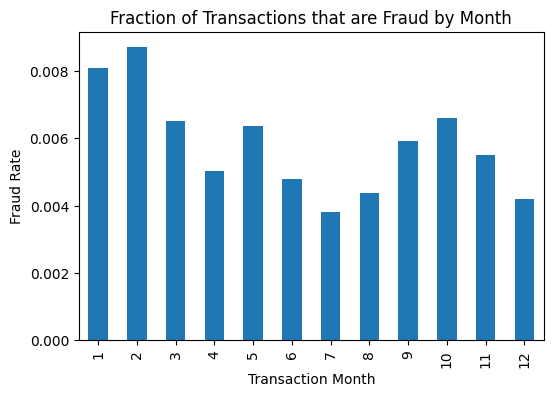

In [19]:
# e.g. by month
monthly = df.groupby('tx_month')['is_fraud'].mean()
monthly.plot(kind='bar', figsize=(6,4))
plt.xlabel("Transaction Month")
plt.ylabel("Fraud Rate")
plt.title("Fraction of Transactions that are Fraud by Month")
plt.show()

In [23]:
# percent missing per column
(df.isna().mean() * 100).sort_values(ascending=False)

# duplicate transactions?
dups = df.duplicated(subset=["trans_num"])
print("Duplicate tx_num:", dups.sum())

Duplicate tx_num: 0


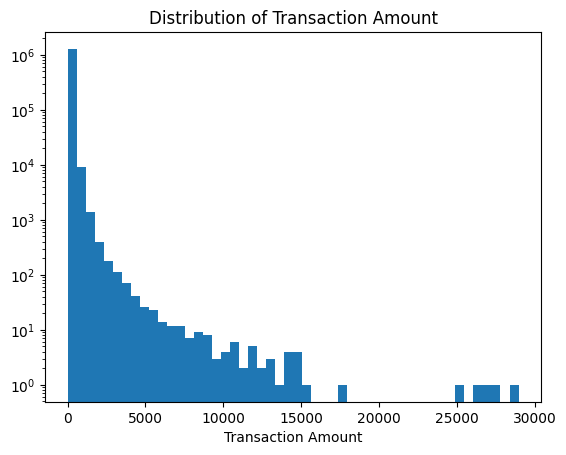

In [24]:
# Amount distribution (log scale if skewed)
plt.hist(df["amt"], bins=50)
plt.yscale("log")
plt.xlabel("Transaction Amount")
plt.title("Distribution of Transaction Amount")
plt.show()

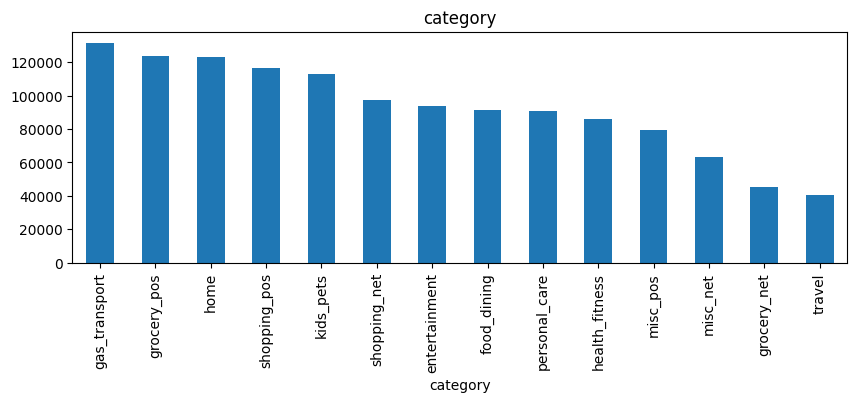

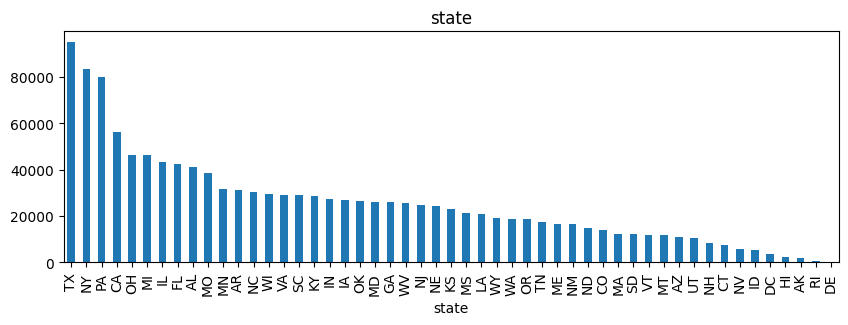

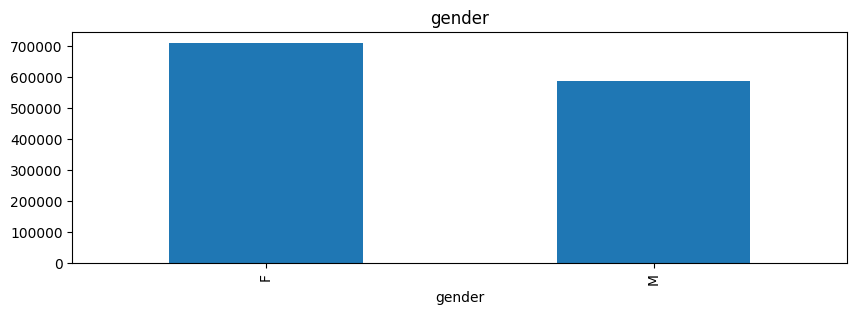

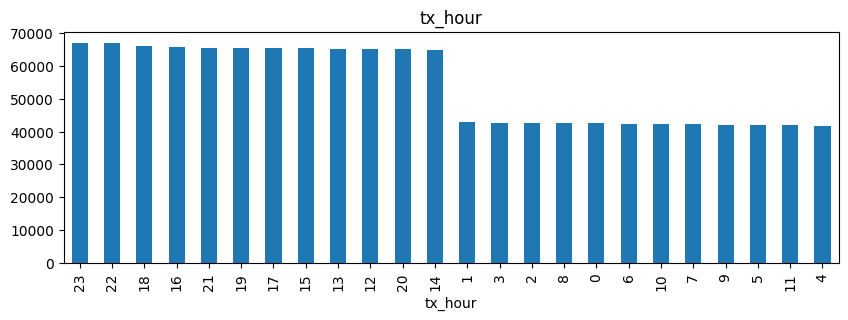

In [26]:
# Categorical counts
for col in ["category","state","gender","tx_hour"]:
    df[col].value_counts().plot(kind="bar", figsize=(10,3))
    plt.title(col)
    plt.show()

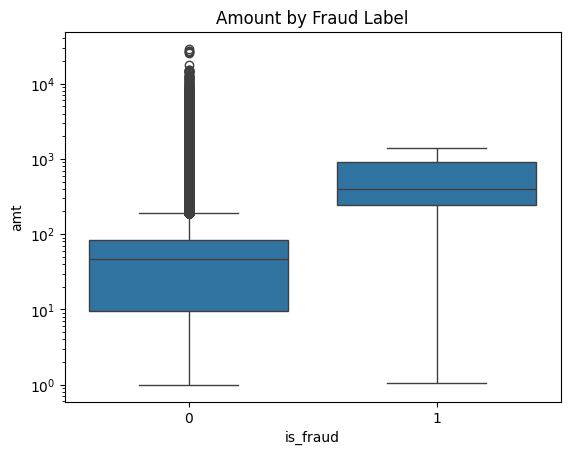

In [27]:
# boxplot: amount by fraud vs non-fraud
sns.boxplot(x="is_fraud", y="amt", data=df)
plt.yscale("log")
plt.title("Amount by Fraud Label")
plt.show()


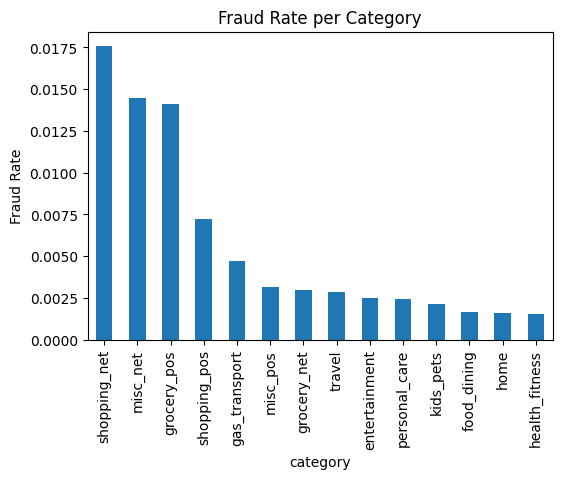

In [28]:
# fraud rate by category
fraud_by_cat = (df.groupby("category")["is_fraud"]
                   .mean()
                   .sort_values(ascending=False))
fraud_by_cat.plot(kind="bar", figsize=(6,4))
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate per Category")
plt.show()

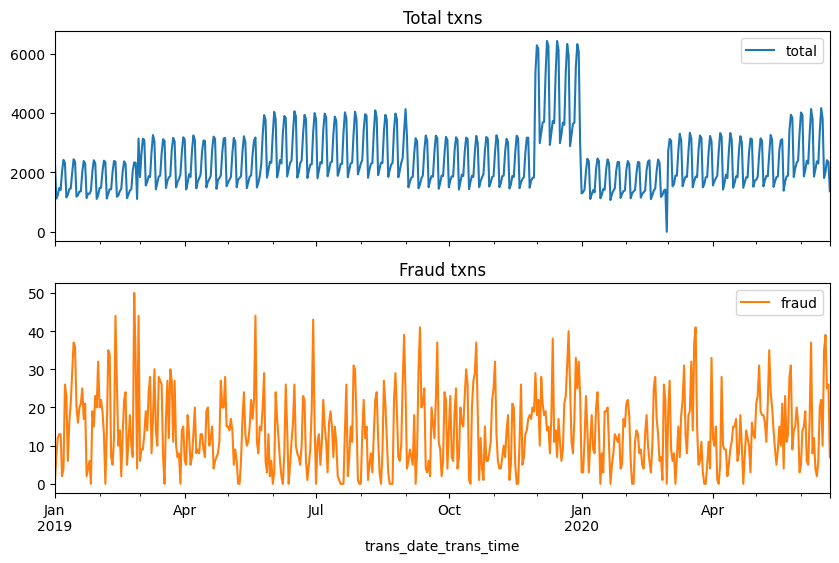

In [29]:
# daily transaction counts & fraud counts
daily = df.set_index("trans_date_trans_time").resample("D")["is_fraud"].agg(["count","sum"])
daily.rename(columns={"count":"total","sum":"fraud"}, inplace=True)
daily.plot(subplots=True, figsize=(10,6), title=["Total txns","Fraud txns"])
plt.show()

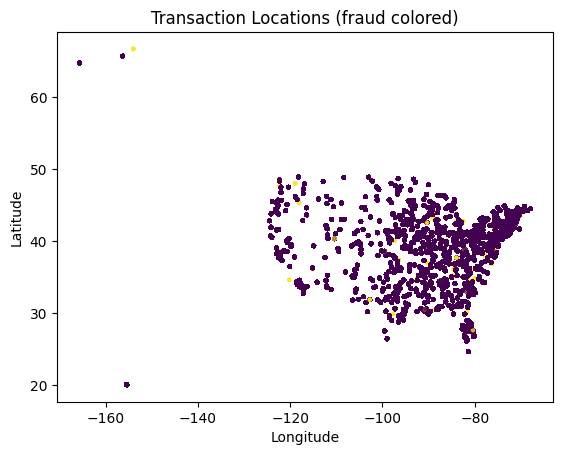

In [33]:
plt.scatter(df["long"], df["lat"],
            c=df["is_fraud"], alpha=0.3, s=5)
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.title("Transaction Locations (fraud colored)")
plt.show()

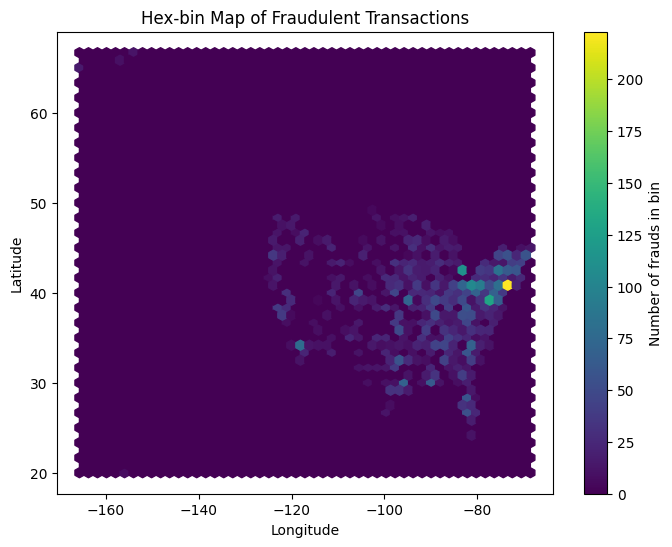

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# filter to frauds only
fraud = df[df.is_fraud == 1]

plt.figure(figsize=(8,6))
hb = plt.hexbin(
    fraud['long'],
    fraud['lat'],
    gridsize=50,               # controls resolution of the hex grid
    reduce_C_function=np.size  # counts points per hexagon
)
cb = plt.colorbar(hb)
cb.set_label('Number of frauds in bin')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hex‐bin Map of Fraudulent Transactions')
plt.show()


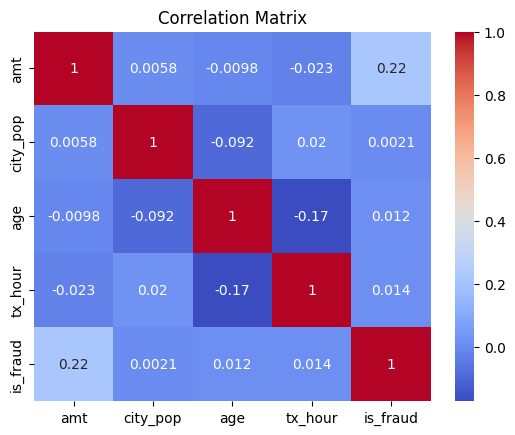

In [34]:
# numeric features only
num_cols = ["amt","city_pop","age","tx_hour","is_fraud"]
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

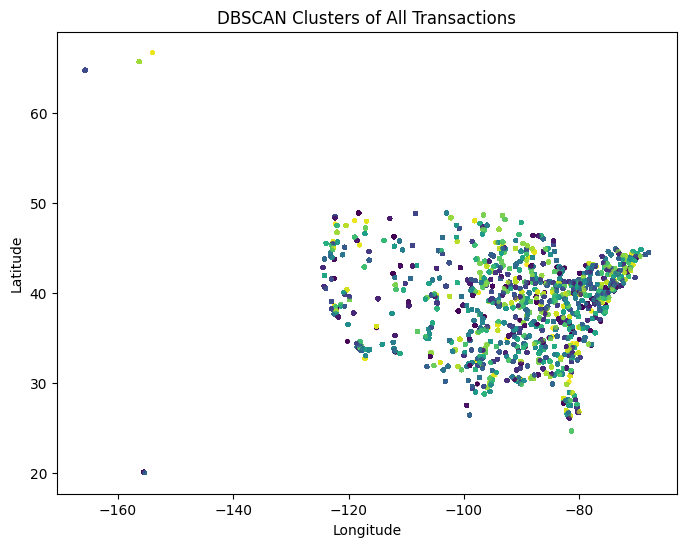

In [36]:
from sklearn.cluster import DBSCAN

# prepare the (lon,lat) array
coords = df[['long','lat']].to_numpy()

# DBSCAN: eps in degrees (≈0.01° ≃ 1 km), min_samples = 10
db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
df['cluster'] = db.labels_

# plot clusters (–1 is noise)
plt.figure(figsize=(8,6))
plt.scatter(
    df['long'],
    df['lat'],
    c=df['cluster'],    # each cluster ID gets its own color
    s=5,
    alpha=0.6
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clusters of All Transactions')
plt.show()
